# US Home Price Analysis
### Life cycle of US Home Price Analysis Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model
#### 1) Problem statement
* This project understands and the Find publicly available data for key **supply-demand** factors that influence US home prices nationally. Then, build a data science model that explains how these factors impacted home prices over the last 20 years.
#### 2) Data Collection
* The data consists of 13 column and 5000 rows.
#### 2.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df =pd.read_csv(r"C:\US-House-Analysis\notebook\data\US_House_Price.csv")

#### Show Top 5 Records

In [4]:
df.head(5)

,Date,State,Housing_Inventory,Construction_Costs,Land_Availability,Interest_Rates,Economic_Conditions,Population_Growth,Consumer_Confidence,Demographic_Trends,House_Price,House_Area_sqft,Location,Amenities
0,01-01-2010,Pennsylvania,60777,172403,Abundant,4.08,Moderate,1.59,High,Aging Population,183909,2286,Urban,Good Schools
1,02-01-2010,Kentucky,133587,121940,Limited,5.75,Weak,1.27,High,Aging Population,320286,2222,Urban,Good Schools
2,03-01-2010,South Dakota,114584,177811,Abundant,4.46,Weak,1.79,Moderate,Millennial Buyers,774649,1709,Suburban,Transport
3,04-01-2010,Texas,73366,192099,Limited,3.28,Weak,1.78,Moderate,Millennial Buyers,300061,1001,Suburban,Transport
4,05-01-2010,Tennessee,105705,161045,Abundant,4.62,Moderate,1.58,Moderate,Aging Population,268774,2666,Suburban,Transport


#### Shape of the dataset

In [5]:
df.shape

(5000, 14)

#### 2.2 Dataset information
* Date: The chronological reference point for the dataset, essential for tracking temporal trends and making informed real estate decisions.

* State: The geographic region with in which housing data is collected, a critical factor in assessing market variations and regulatory influences.

* Housing Inventory: The quantity of available residential properties, a pivotal metric for gauging supply and demand dynamics within a housing market.

* Construction Costs: The expenses associated with building or renovating residential properties, influencing both housing supply and pricing.

* Land Availability: The extent to which land suitable for housing development is accessible, a factor that can dictate future market expansion and pricing.

* Interest Rates: The prevailing rates at which borrowers can access financing, impacting housing affordability and demand.

* Economic Conditions: The overall financial health and stability of the region, influencing job prospects and residents ability to purchase homes.

* Population Growth: The rate at which the local population is increasing or decreasing, indicative of housing demand and potential investment opportunities.

* Consumer Confidence: The sentiment among potential homebuyers, which can sway market activity and housing price trends.

* Demographic Trends: Patterns in the population's age, income, and household composition, shaping housing preferences and market demands.

* Location & Amenities: The attractiveness of a property's location and its proximity to essential amenities, influencing its desirability and value.

* House Price ($): The cost of purchasing a residential property, a fundamental indicator of market performance.

* House Area (sqft): The size of a residential property, a crucial factor affecting its market value and suitability for different buyer demographics.

#### 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column
#### 3.1 Check Missing values

In [6]:
df.isna().sum()

Date                   0
State                  0
Housing_Inventory      0
Construction_Costs     0
Land_Availability      0
Interest_Rates         0
Economic_Conditions    0
Population_Growth      0
Consumer_Confidence    0
Demographic_Trends     0
House_Price            0
House_Area_sqft        0
Location               0
Amenities              0
dtype: int64

Insight
- The dataset is complete with no missing values, ensuring the integrity of the data for analysis.
#### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

Insight
- No duplicated values are present in the dataset, reducing the risk of data redundancy and ensuring data consistency
#### 3.3 Check data type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 5000 non-null   object 
 1   State                5000 non-null   object 
 2   Housing_Inventory    5000 non-null   int64  
 3   Construction_Costs   5000 non-null   int64  
 4   Land_Availability    5000 non-null   object 
 5   Interest_Rates       5000 non-null   float64
 6   Economic_Conditions  5000 non-null   object 
 7   Population_Growth    5000 non-null   float64
 8   Consumer_Confidence  5000 non-null   object 
 9   Demographic_Trends   5000 non-null   object 
 10  House_Price          5000 non-null   int64  
 11  House_Area_sqft      5000 non-null   int64  
 12  Location             5000 non-null   object 
 13  Amenities            5000 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 547.0+ KB


Insights
- In the above dataset there is no null values 
- there are 3 types of datatypes object, float and int
- computers are only understanding the numbers but we have objests (or) charecters also
- These objects are converted into numbers with the help of preprocessing step.

#### 3.4 Checking the number of unique values of each column

In [10]:
df.nunique()

Date                   4993
State                    50
Housing_Inventory      4934
Construction_Costs     4870
Land_Availability         2
Interest_Rates          301
Economic_Conditions       3
Population_Growth       151
Consumer_Confidence       3
Demographic_Trends        2
House_Price            4973
House_Area_sqft        2438
Location                  2
Amenities                 2
dtype: int64

Insights
- Geographic Diversity: The dataset covers data for 50 different states, indicating a wide geographical coverage.

- Temporal Variability: The Date column shows a wide range of unique date values, suggesting that data was collected over a significant period, potentially allowing for time-series analysis.

- Housing Inventory Spread: The Housing Inventory column contains a large number of unique values, indicating variations in housing inventory levels across different observations or regions.

- Construction Cost Range: The Construction Costs column has a diverse set of unique values, which can be useful for analyzing the cost of construction across different scenarios.

- Land Availability Categories: The Land Availability column has only 2 unique values, suggesting a binary classification for land availability, which may be valuable for assessing the impact of land availability on other factors in the dataset.

#### 3.5 Check statistics of data set

In [11]:
df.describe()

,Housing_Inventory,Construction_Costs,Interest_Rates,Population_Growth,House_Price,House_Area_sqft
count,5000.000000,5000.00000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,123569.872400,149417.91820,4.507358,1.251860,4.985443e+05,2511.407200
std,43064.737015,29261.94493,0.863476,0.430632,2.395380e+05,869.131439
min,50023.000000,100018.00000,3.000000,0.500000,1.501350e+05,1000.000000
25%,86861.250000,123799.50000,3.780000,0.880000,3.122615e+05,1765.750000
50%,121774.000000,148790.00000,4.510000,1.250000,4.871920e+05,2520.500000
75%,161180.500000,174897.25000,5.250000,1.620000,6.524260e+05,3252.500000
max,199963.000000,199928.00000,6.000000,2.000000,1.995582e+06,3999.000000


Insights
Insight
* From above description of numerical data, all means are very close to each other - between 1.25 and 498000;
* All standard deviations are also close - between 0.434 and 2379069;
* While there is a minimum score 0.5 for Population Growth.
- In the 75 percentile and max value there is no vary large difference, and the outliers of the above dataset is not more then that.
- In the describe is a python function and it is used to find the descriptive statistics of the dataset
- It gives summary statistics like mean, standard deviation, minimum, maximum, quartiles, etc., for each numerical column in the DataFrame.
- These statistics help you understand the central tendency, spread, and distribution of your data

#### 3.6 Exploring Data

In [16]:
df.head()

,Date,State,Housing_Inventory,Construction_Costs,Land_Availability,Interest_Rates,Economic_Conditions,Population_Growth,Consumer_Confidence,Demographic_Trends,House_Price,House_Area_sqft,Location,Amenities
0,01-01-2010,Pennsylvania,60777,172403,Abundant,4.08,Moderate,1.59,High,Aging Population,183909,2286,Urban,Good Schools
1,02-01-2010,Kentucky,133587,121940,Limited,5.75,Weak,1.27,High,Aging Population,320286,2222,Urban,Good Schools
2,03-01-2010,South Dakota,114584,177811,Abundant,4.46,Weak,1.79,Moderate,Millennial Buyers,774649,1709,Suburban,Transport
3,04-01-2010,Texas,73366,192099,Limited,3.28,Weak,1.78,Moderate,Millennial Buyers,300061,1001,Suburban,Transport
4,05-01-2010,Tennessee,105705,161045,Abundant,4.62,Moderate,1.58,Moderate,Aging Population,268774,2666,Suburban,Transport


In [17]:
print("Categories in 'State' variable:     ",end=" " )
print(df['State'].unique())

print("Categories in 'Land Availability' variable:  ",end=" ")
print(df['Land_Availability'].unique())

print("Categories in'Economic Conditions' variable:",end=" " )
print(df['Economic_Conditions'].unique())

print("Categories in 'Consumer Confidence' variable:     ",end=" " )
print(df['Consumer_Confidence'].unique())

print("Categories in 'Demographic Trends' variable:     ",end=" " )
print(df['Demographic_Trends'].unique())

print("Categories in 'Location & Amenities' variable:     ",end=" " )
print(df['Location'].unique())

print("Categories in 'Location & Amenities' variable:     ",end=" " )
print(df['Amenities'].unique())

Categories in 'State' variable:      ['Pennsylvania' 'Kentucky' 'South Dakota' 'Texas' 'Tennessee' 'Illinois'
 'Oregon' 'Wisconsin' 'Washington' 'Utah' 'Connecticut' 'Oklahoma'
 'Maryland' 'Hawaii' 'West Virginia' 'Indiana' 'Maine' 'Rhode Island'
 'Florida' 'Georgia' 'Alabama' 'Arkansas' 'Mississippi' 'New York' 'Iowa'
 'Michigan' 'North Dakota' 'Alaska' 'Colorado' 'Virginia' 'Kansas' 'Ohio'
 'Nebraska' 'South Carolina' 'New Hampshire' 'Wyoming' 'Louisiana'
 'California' 'Nevada' 'Idaho' 'Missouri' 'Delaware' 'Massachusetts'
 'New Jersey' 'New Mexico' 'North Carolina' 'Minnesota' 'Vermont'
 'Montana' 'Arizona']
Categories in 'Land Availability' variable:   ['Abundant' 'Limited']
Categories in'Economic Conditions' variable: ['Moderate' 'Weak' 'Strong']
Categories in 'Consumer Confidence' variable:      ['High' 'Moderate' 'Low']
Categories in 'Demographic Trends' variable:      ['Aging Population' 'Millennial Buyers']
Categories in 'Location & Amenities' variable:      ['Urban' 'Suburban

In [18]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['Housing_Inventory', 'Construction_Costs', 'Interest_Rates', 'Population_Growth', 'House_Price', 'House_Area_sqft']

We have 8 categorical features : ['Date', 'State', 'Land_Availability', 'Economic_Conditions', 'Consumer_Confidence', 'Demographic_Trends', 'Location', 'Amenities']


Insights
- In our dataset we have 6 numerical columns and 8 categorical columns

##### 3.7 Adding columns for "Price per Square Foot", "Mortgage Payment Estimate" and "Yearly Growth Rate"

In [23]:
# Create a new column for Price per Sqft
df['Price per Sqft'] = df['House_Price'] / df['House_Area_sqft']

# Assuming you have data for interest rates and house prices
interest_rates = df['Interest_Rates'] / 100  # Convert interest rates to decimal

# Calculate monthly mortgage payment
df['Monthly Mortgage Payment'] = (df['House_Price'] * (interest_rates / 12)) / (1 - (1 + interest_rates / 12) ** (-30 * 12))

# Assuming you have a 'Date' column as a string in the format "%d-%m-%Y"
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sort the DataFrame by 'Date' to ensure it's in chronological order
df = df.sort_values(by='Date')

# Calculate the yearly growth rate for rows with at least 12 months of data
df['Yearly Growth Rate'] = df.groupby('State')['House_Price'].pct_change(periods=12) * 100

# Fill NaN values with 0 or any other appropriate value
df['Yearly Growth Rate'].fillna(0, inplace=True)


Insights
- **Price per sqft** is a metric that represents the cost of a property per square foot of living space, providing a standardized way to compare the relative value of different-sized properties. It is calculated by dividing the house price by the total square footage of the property.
- The **Monthly Mortgage Payment** calculates the fixed monthly amount a homeowner must pay to cover the principal and interest on their home loan, assuming a 30-year fixed-rate mortgage and using the provided house price and interest rate data.
- The Yearly Growth Rate represents the percentage change in house prices compared to the same month in the previous year, indicating the annual rate of appreciation or depreciation in property values.
- Factors such as low interest rates and increasing demand for housing have driven up house prices in the US, creating upward pressure on property values. Additionally, limited housing supply in some regions has further intensified price growth.

In [29]:
df.head()

,Date,State,Housing_Inventory,Construction_Costs,Land_Availability,Interest_Rates,Economic_Conditions,Population_Growth,Consumer_Confidence,Demographic_Trends,House_Price,House_Area_sqft,Location,Amenities,Price per Sqft,Monthly Mortgage Payment,Yearly Growth Rate
0,2010-01-01,Pennsylvania,60777,172403,Abundant,4.08,Moderate,1.59,High,Aging Population,183909,2286,Urban,Good Schools,80.450131,886.512901,0.0
4993,2010-01-01,New Hampshire,153448,117808,Abundant,5.80,Moderate,1.80,Low,Millennial Buyers,528367,1722,Urban,Good Schools,306.833333,3100.209425,0.0
1,2010-01-02,Kentucky,133587,121940,Limited,5.75,Weak,1.27,High,Aging Population,320286,2222,Urban,Good Schools,144.143114,1869.102159,0.0
4994,2010-01-02,Iowa,183645,130035,Limited,3.28,Strong,0.90,High,Millennial Buyers,744109,3348,Suburban,Transport,222.254779,3250.673847,0.0
2,2010-01-03,South Dakota,114584,177811,Abundant,4.46,Weak,1.79,Moderate,Millennial Buyers,774649,1709,Suburban,Transport,453.276185,3906.643028,0.0


### 4. Data Visualization

#### Yearly Growth

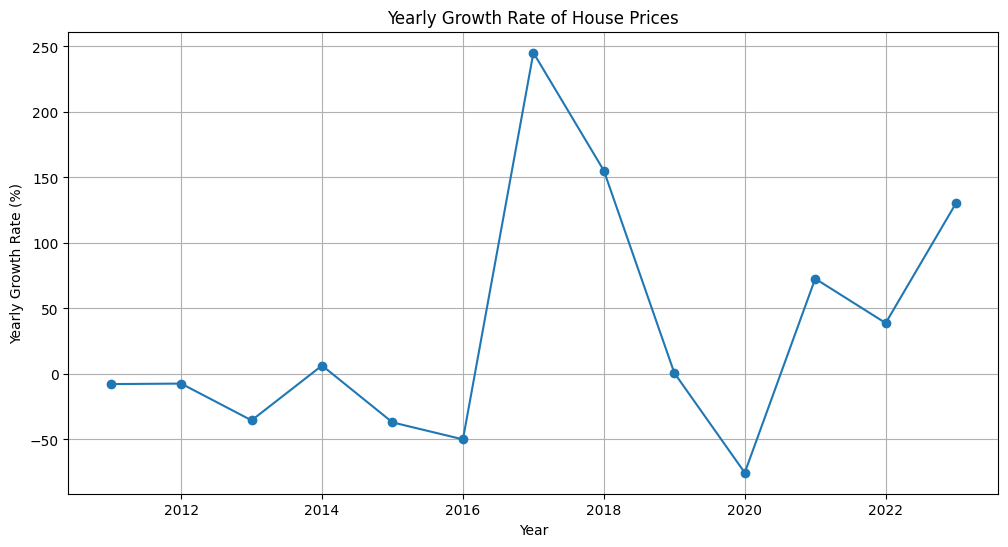

In [30]:
# Assuming you have a DataFrame 'df' with 'Date' and 'House Price ($)' columns
# Make sure to sort your DataFrame by 'Date' if it's not already sorted

# Convert 'Date' to a datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Initialize lists to store years and corresponding growth rates
years = []
growth_rates = []

# Iterate through each year to calculate yearly growth rates
for year in range(df.index.min().year + 1, df.index.max().year + 1):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    
    # Filter data for the current year
    yearly_data = df[(df.index >= start_date) & (df.index < end_date)]
    
    # Calculate the yearly growth rate and append to lists
    if len(yearly_data) > 1:
        yearly_growth = (yearly_data['House_Price'].iloc[-1] - yearly_data['House_Price'].iloc[0]) / yearly_data['House_Price'].iloc[0] * 100
        years.append(year)
        growth_rates.append(yearly_growth)

# Create a DataFrame for the calculated growth rates
yearly_growth_df = pd.DataFrame({'Year': years, 'Yearly Growth Rate': growth_rates})

# Plot the yearly growth rates
plt.figure(figsize=(12, 6))
plt.plot(yearly_growth_df['Year'], yearly_growth_df['Yearly Growth Rate'], marker='o', linestyle='-')
plt.title('Yearly Growth Rate of House Prices')
plt.xlabel('Year')
plt.ylabel('Yearly Growth Rate (%)')
plt.grid(True)

# Show the plot
plt.show()


Insights
- It appears that in your dataset, the year 2018 experienced the highest and most significant growth in house prices, indicating a peak in property value appreciation during that year.
- In 2020 is low growth will be recorded as our dataset.
- Based on the information provided, it's expected that from the 3rd quarter of 2020 to the 3rd quarter of 2023, there will be a gradual and sustained growth in house prices, indicating a positive trend in property value appreciation during this period.

#### Bar Plot for State-wise Housing Inventory

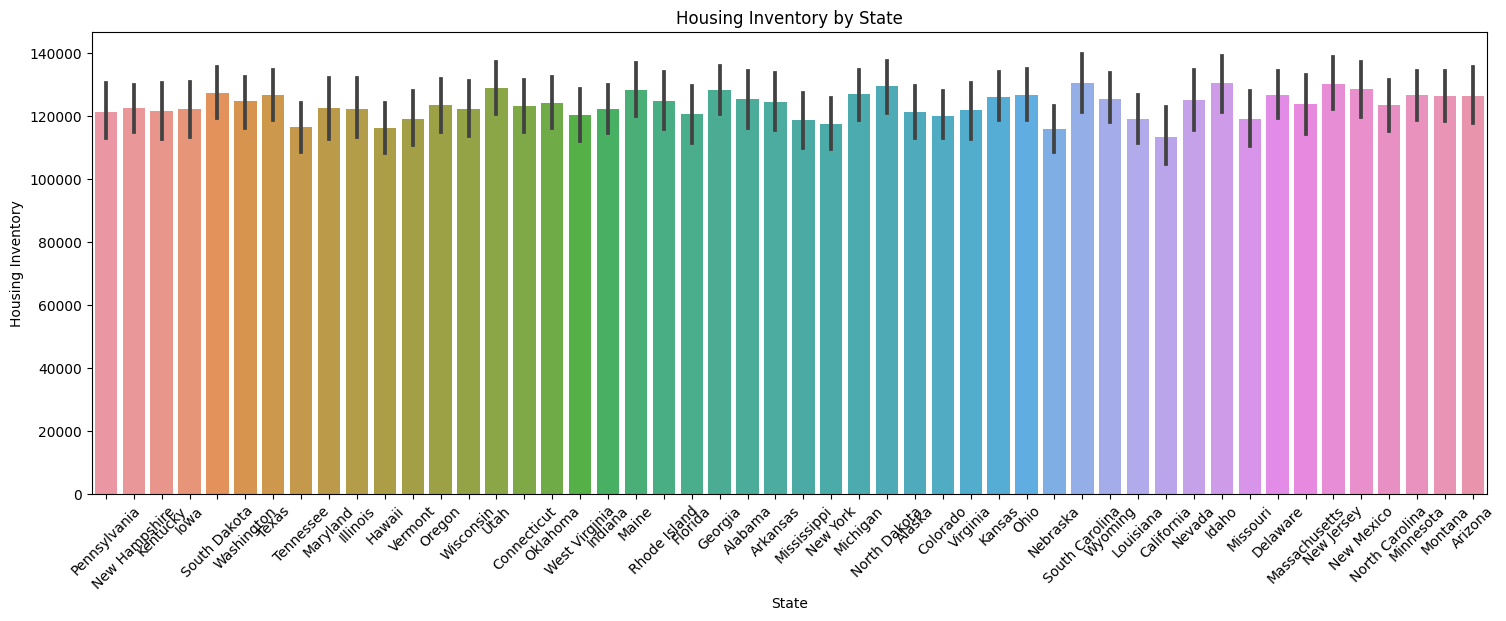

In [35]:
plt.figure(figsize=(18, 6))
sns.barplot(x='State', y='Housing_Inventory', data=df)
plt.title('Housing Inventory by State')
plt.xlabel('State')
plt.ylabel('Housing Inventory')
plt.xticks(rotation=45)
plt.show()


Insights
- The state of California stands out as having the highest housing inventory among all the states depicted in the plot. This suggests that California likely has a significant number of available housing units compared to the other states in the dataset.
- The bar plot also shows that there is substantial variability in housing inventory across the different states. Some states have considerably lower housing inventory compared to California and may be experiencing housing shortages or have smaller housing markets.

#### Scatter Plot for House Area vs. Price per Sqft

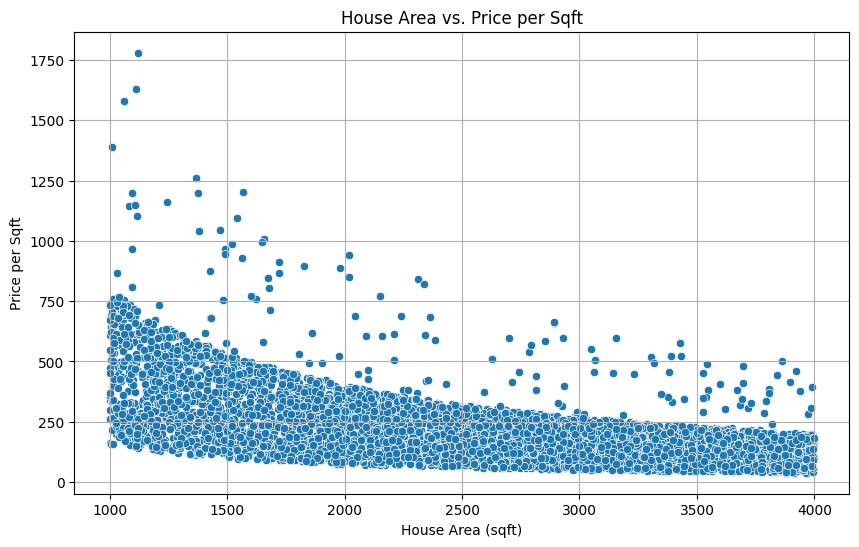

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='House_Area_sqft', y='Price per Sqft', data=df)
plt.title('House Area vs. Price per Sqft')
plt.xlabel('House Area (sqft)')
plt.ylabel('Price per Sqft')
plt.grid(True)
plt.show()


#### Histogram for Economic Conditions

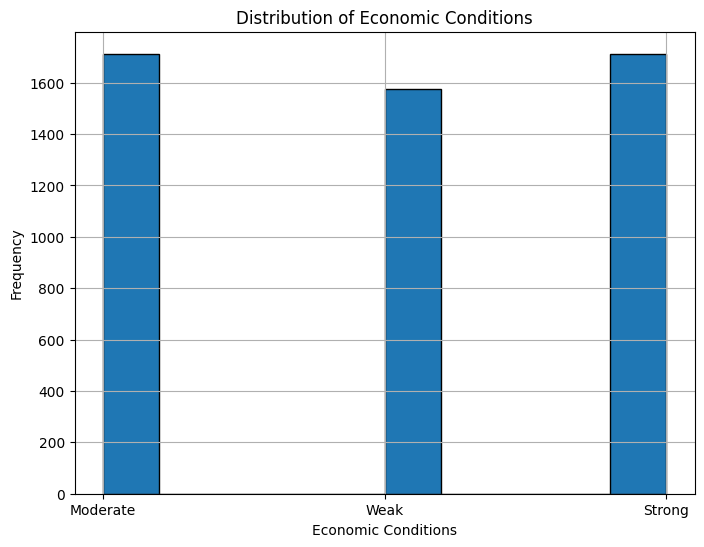

In [38]:
plt.figure(figsize=(8, 6))
plt.hist(df['Economic_Conditions'], bins=10, edgecolor='k')
plt.title('Distribution of Economic Conditions')
plt.xlabel('Economic Conditions')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### Box Plot for Interest Rates by State

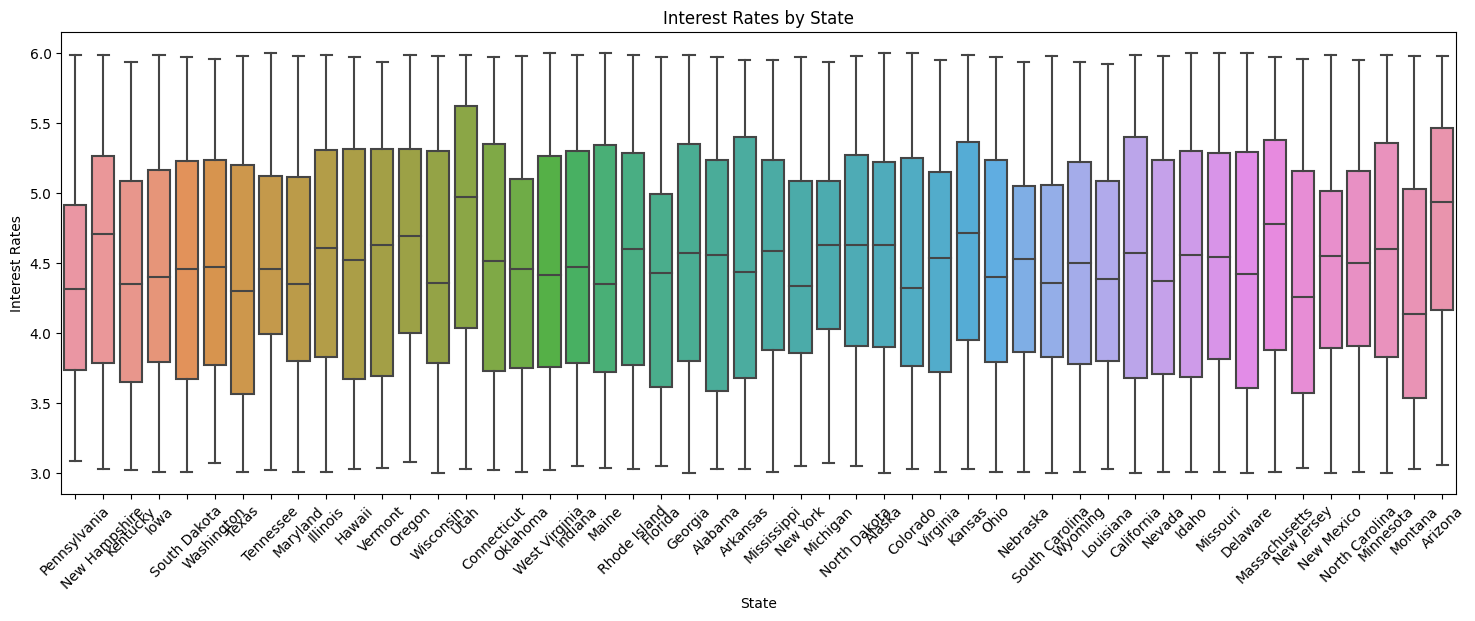

In [41]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='State', y='Interest_Rates', data=df)
plt.title('Interest Rates by State')
plt.xlabel('State')
plt.ylabel('Interest Rates')
plt.xticks(rotation=45)
plt.show()


#### Box Plot for Housing Inventory by State

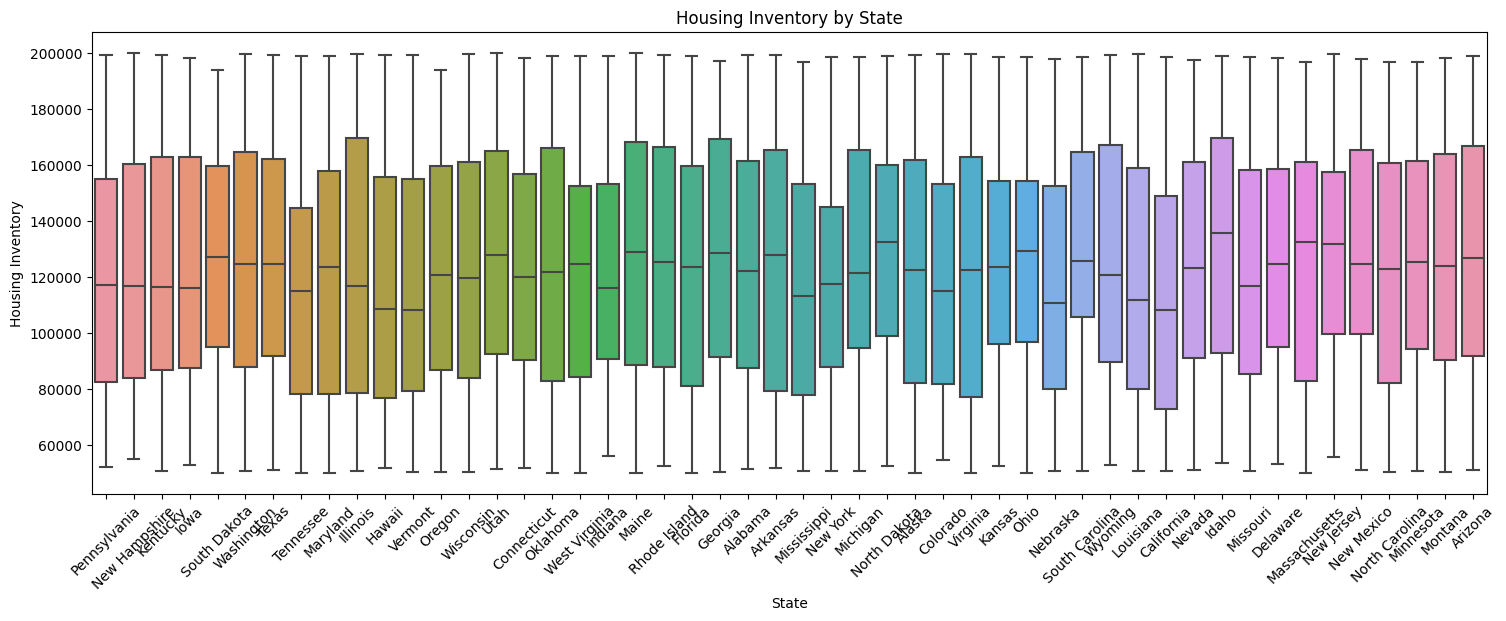

In [50]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='State', y='Housing_Inventory', data=df)
plt.title('Housing Inventory by State')
plt.xlabel('State')
plt.ylabel('Housing Inventory')
plt.xticks(rotation=45)
plt.show()


#### Line Plot for Monthly Mortgage Payment Over Time

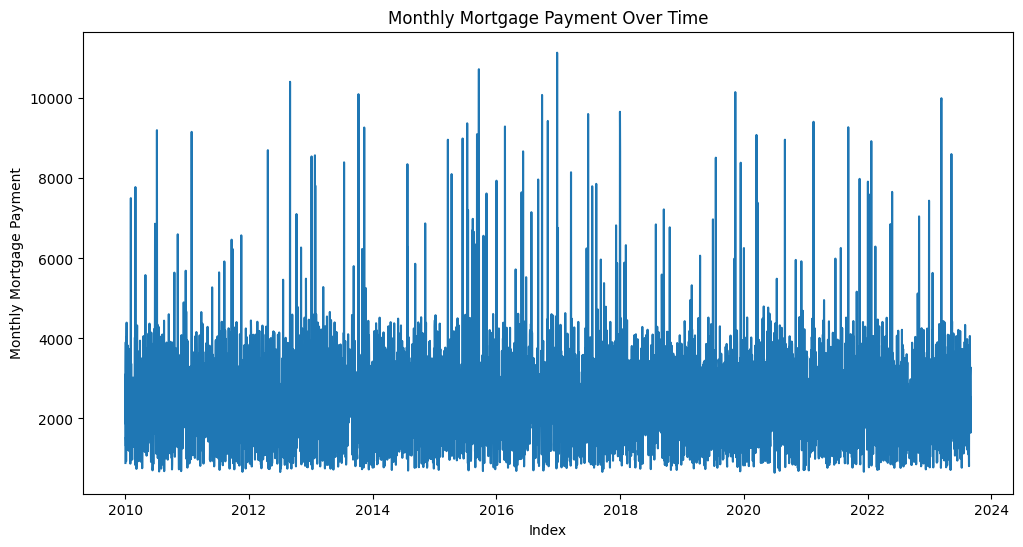

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Monthly Mortgage Payment'])
plt.title('Monthly Mortgage Payment Over Time')
plt.xlabel('Index')
plt.ylabel('Monthly Mortgage Payment')
plt.show()


#### Interest Rates vs. Consumer Confidence

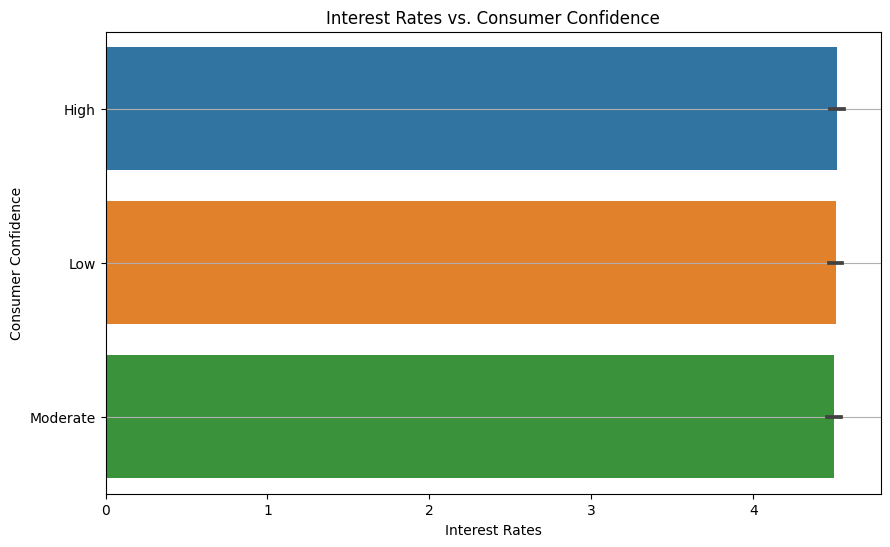

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Interest_Rates', y='Consumer_Confidence', data=df)
plt.title('Interest Rates vs. Consumer Confidence')
plt.xlabel('Interest Rates')
plt.ylabel('Consumer Confidence')
plt.grid(axis='y')
plt.show()


Insights
- The plot suggests an inverse relationship between Interest Rates and Consumer Confidence. As Interest Rates increase, Consumer Confidence appears to decrease.
- The plot also shows that there is some variability in Consumer Confidence at different interest rate levels. There are fluctuations in Consumer Confidence across the range of interest rates, indicating that other factors beyond interest rates likely influence consumer sentiment.

#### Scatter Plot for House Price vs. Monthly Mortgage Payment

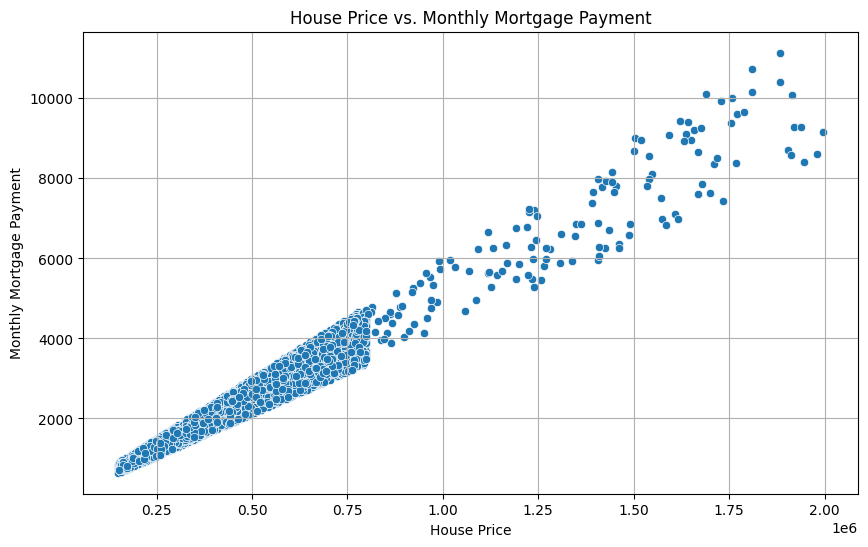

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='House_Price', y='Monthly Mortgage Payment', data=df)
plt.title('House Price vs. Monthly Mortgage Payment')
plt.xlabel('House Price')
plt.ylabel('Monthly Mortgage Payment')
plt.grid(True)
plt.show()


Insights
- The scatter plot shows a generally positive linear relationship between house prices and monthly mortgage payments. As house prices increase, monthly mortgage payments also tend to increase. This indicates that more expensive homes typically require larger monthly mortgage payments, which is a fundamental concept in real estate.
- While there is a clear trend of increasing mortgage payments with higher house prices, there is also notable variability in the data points. This variability suggests that other factors, such as interest rates, down payments, and loan terms, may also influence monthly mortgage payments.

#### Bar Plot for Yearly Growth Rate by State

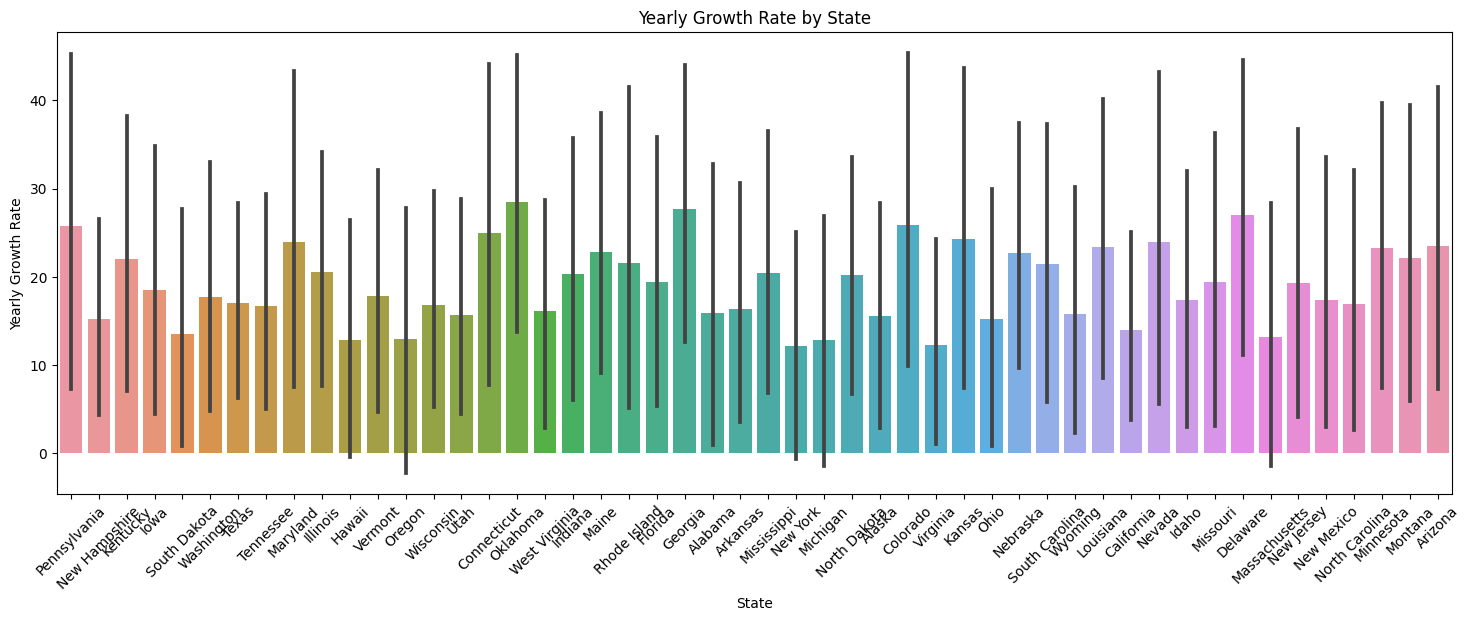

In [59]:
plt.figure(figsize=(18, 6))
sns.barplot(x='State', y='Yearly Growth Rate', data=df)
plt.title('Yearly Growth Rate by State')
plt.xlabel('State')
plt.ylabel('Yearly Growth Rate')
plt.xticks(rotation=45)
plt.show()


Insights
- The plot highlights significant variations in yearly growth rates across different states. Some states likely exhibit higher growth rates, indicating potentially lucrative real estate markets, while others may have slower growth, suggesting less favorable investment prospects.
- Investors can use this plot to make informed decisions about where to allocate their resources in the real estate market. States with higher growth rates may present better investment opportunities, while states with lower growth rates may require a more cautious approach or further investigation before investing.

#### Multivariate analysis using pieplot

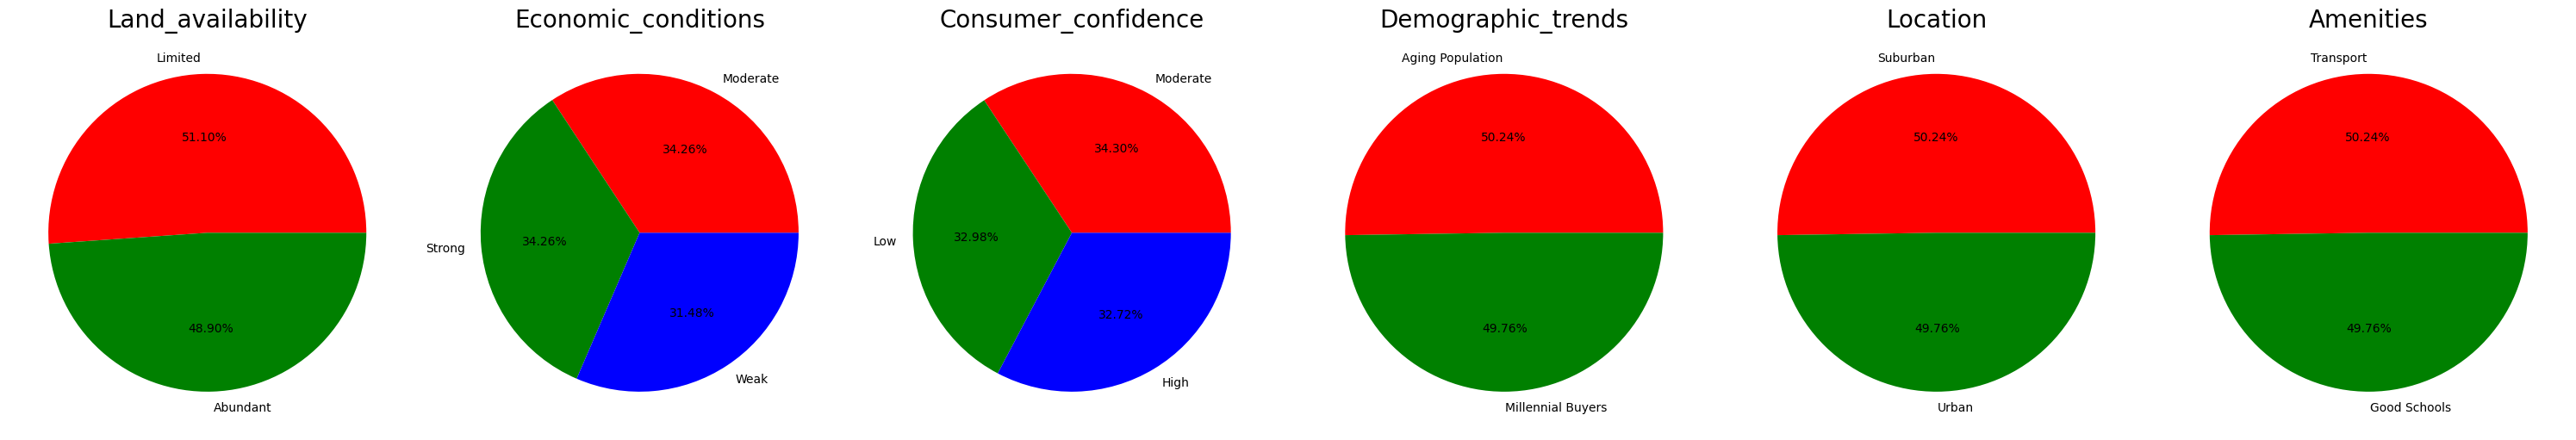

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the list of columns for which you want to create pie charts
columns_to_visualize = ['Land_Availability', 'Economic_Conditions', 'Consumer_Confidence', 'Demographic_Trends',"Location",'Amenities']

# Set the figure size
plt.rcParams['figure.figsize'] = (30, 12)

# Create subplots in a loop for each column
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(1, 6, i)
    
    # Calculate the size and labels for the pie chart
    size = df[column].value_counts()
    labels = size.index
    colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']  # You can add more colors as needed
    
    # Create the pie chart
    plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
    
    # Set the title and turn off axis
    plt.title(column.capitalize(), fontsize=20)
    plt.axis('off')

# Adjust layout and show the plots
plt.tight_layout()
plt.grid()
plt.show()


Insights
* Number of Limited and Abundant Land avalability is almost equal
* The numner of economic condition is almost similar to all conditions but modorate is higher
* Consumer condition is higher in Moderate level and remaining is equal
* The demographic trends is almost equal 
* The location of the houses is higher in suburbun 
* The Amenties of the above pie chart is Transport is higher percentage

####  Consumer_Confidence Column
* How is Group wise distribution ?
* Is Consumer Confidence has any impact on House price Analysis ?
##### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

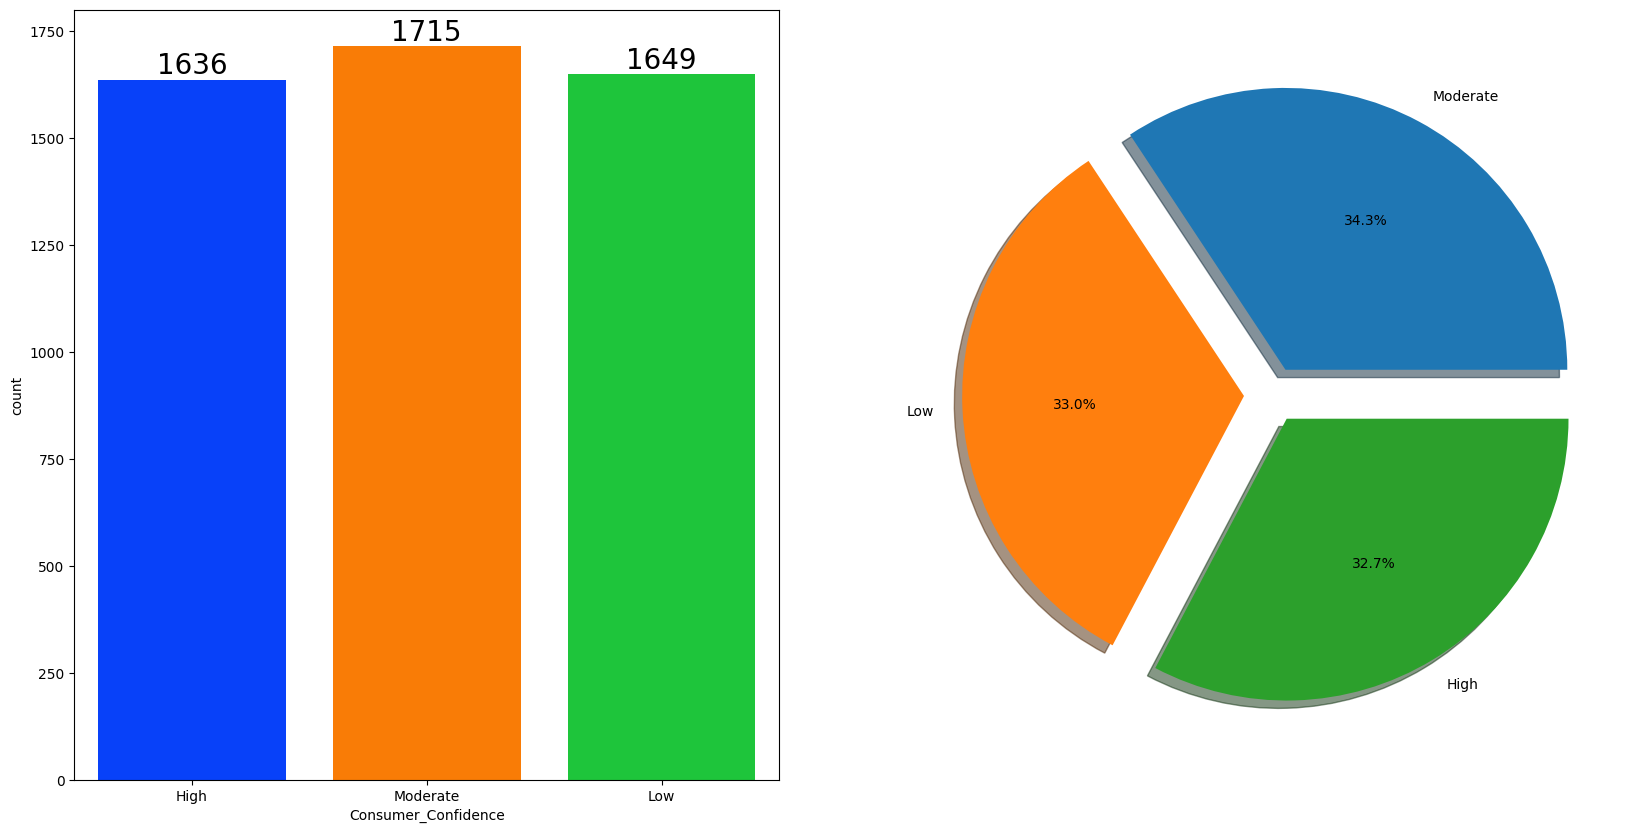

In [10]:
data_counts = df['Consumer_Confidence'].value_counts()

# Create an explode list with the same length as the number of categories
explode = [0.1] * len(data_counts)

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Create countplot
sns.countplot(x=df['Consumer_Confidence'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Create pie chart
ax[1].pie(x=data_counts, labels=data_counts.index, explode=explode, autopct='%1.1f%%', shadow=True)

plt.show()


##### 4.4.1 Location COLUMN
* How is distribution of Location ?
* Is Location has any impact on House Price Analysis ?
##### UNIVARIATE ANALYSIS ( How is distribution of Location ? )

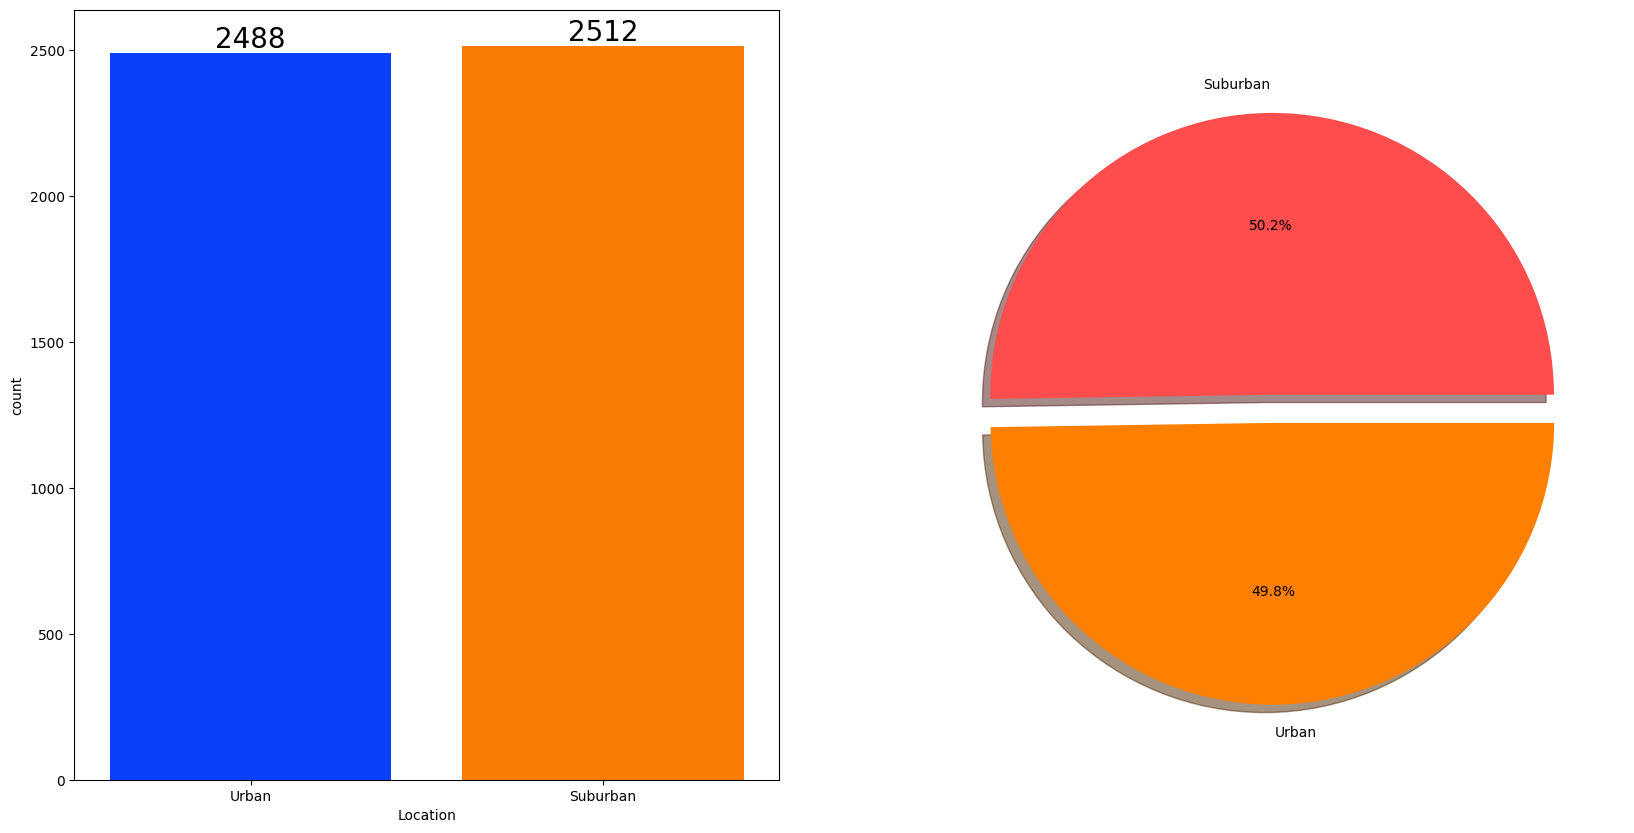

In [13]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x=df['Location'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

location_counts = df['Location'].value_counts()
location_labels = location_counts.index


ax[1].pie(x=location_counts, labels=location_labels, explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])

plt.show()


Insights
* Location has the equall in our data set

#### CHECKING OUTLIERS

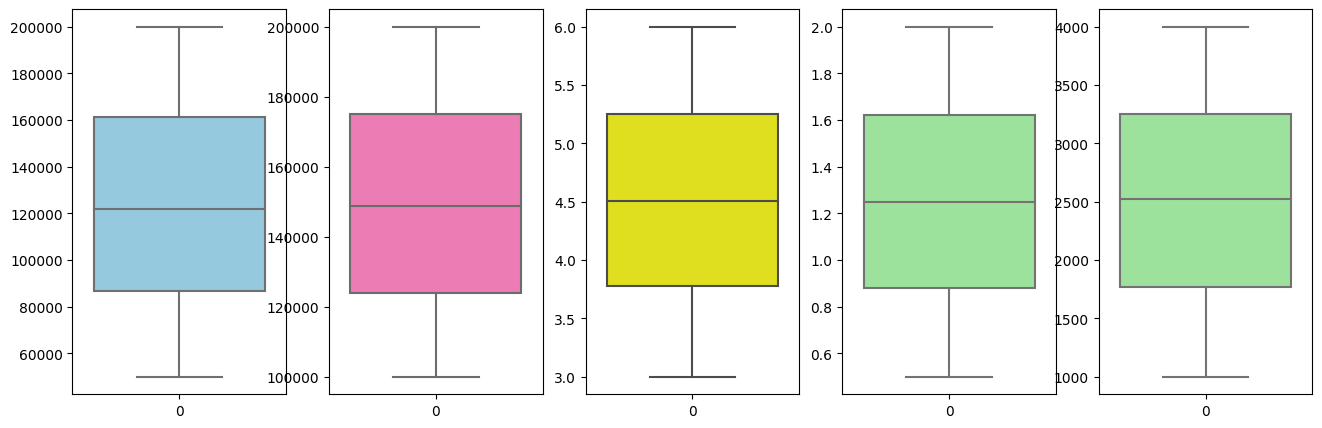

In [18]:
plt.subplots(1, 5, figsize=(16, 5))

plt.subplot(151)
sns.boxplot(df['Housing_Inventory'], color='skyblue')

plt.subplot(152)
sns.boxplot(df['Construction_Costs'], color='hotpink')

plt.subplot(153)
sns.boxplot(df['Interest_Rates'], color='yellow')

plt.subplot(154)
sns.boxplot(df['Population_Growth'], color='lightgreen')

plt.subplot(155)
sns.boxplot(df['House_Area_sqft'], color='lightgreen')

plt.show()


Insights
* The above features are clean and there is no outliers in the dataset

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

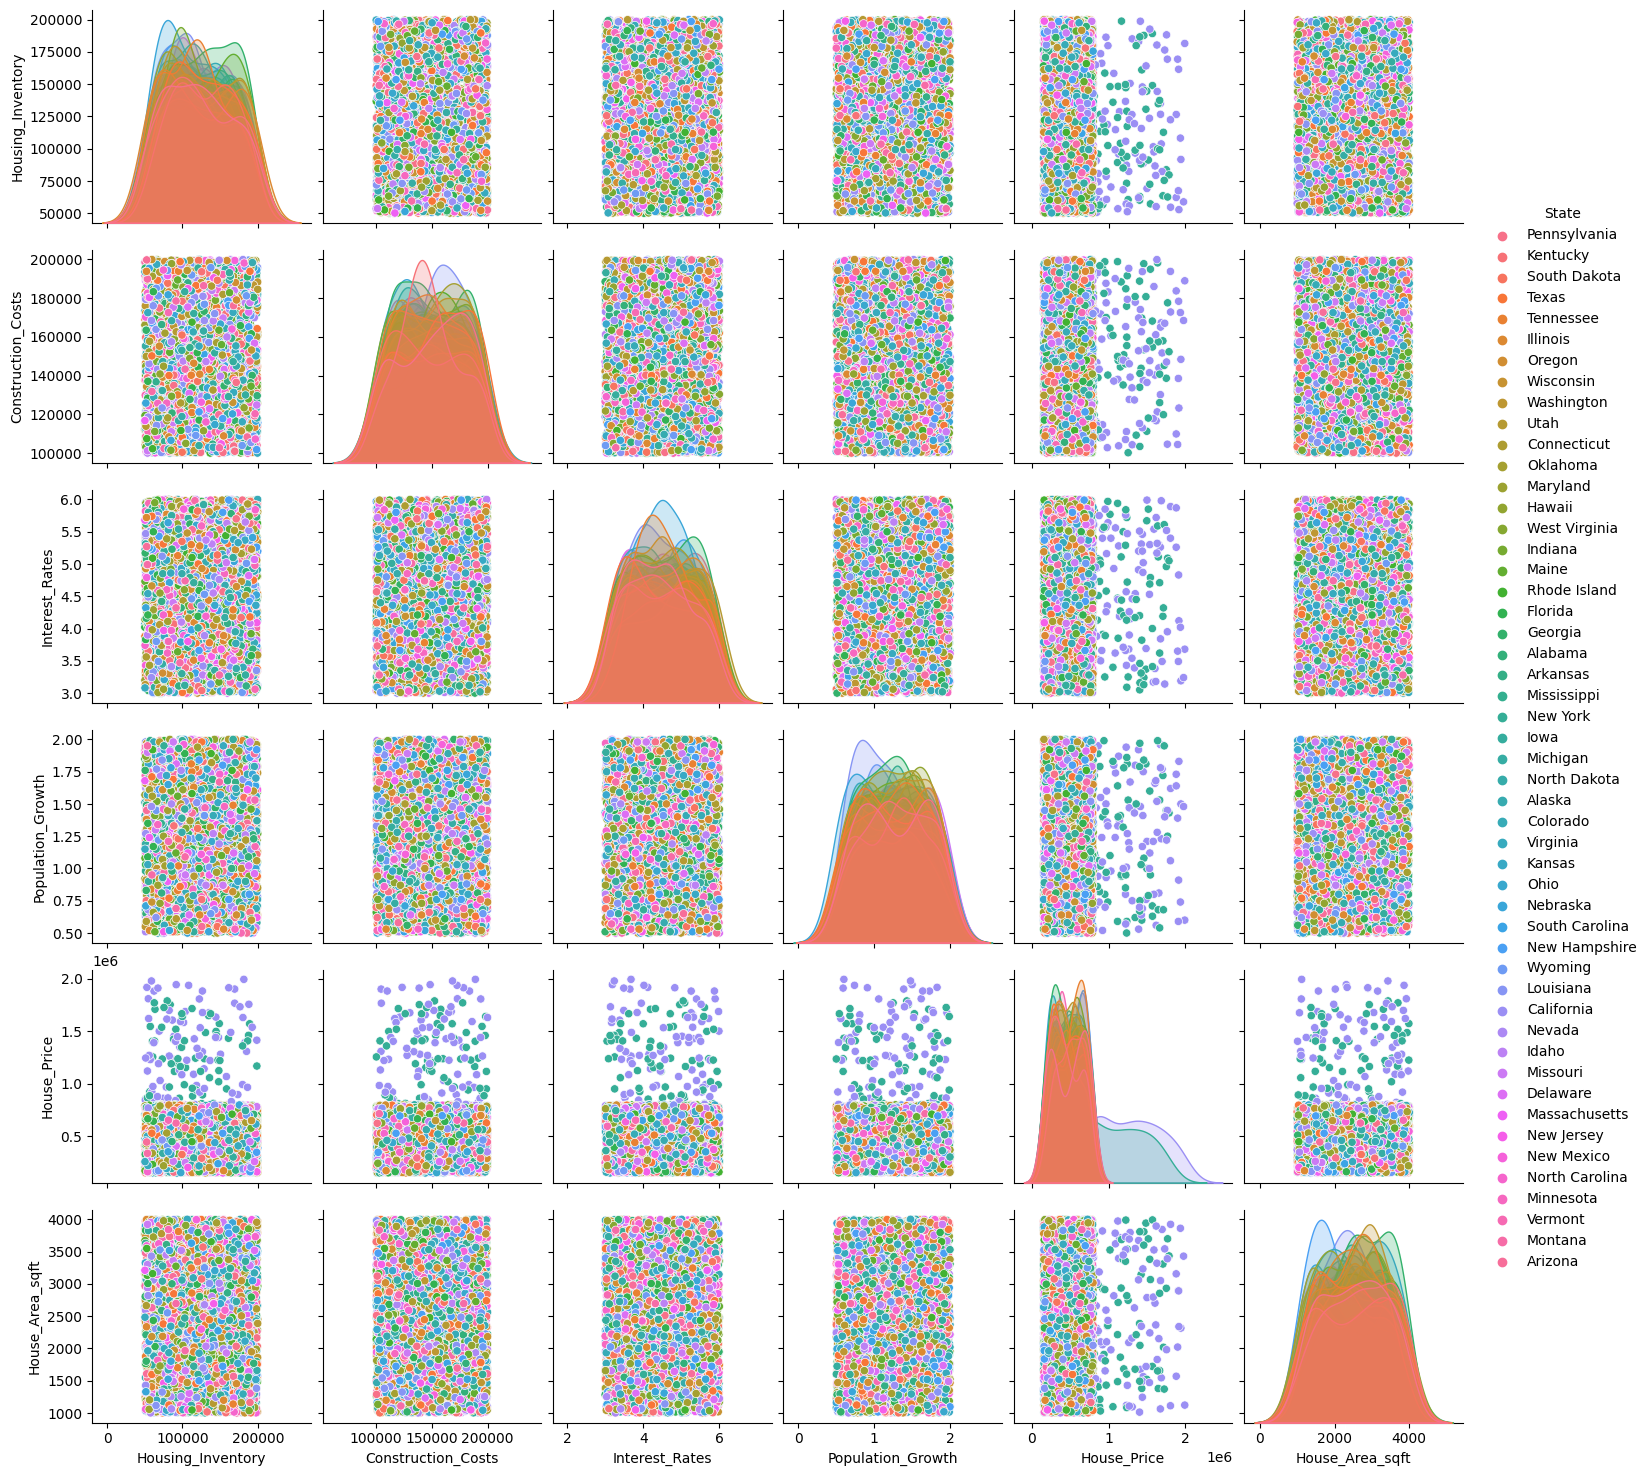

In [19]:
sns.pairplot(df,hue = 'State')
plt.show()

Insights
* From the above plot it is clear that all the State increase linearly with each other.
#### 5. Conclusions
* Market Trends Drive Prices: House prices are heavily influenced by economic conditions, interest rates, and local supply and demand dynamics.
- Location is Key: Desirable neighborhoods and amenities command higher prices, making location a primary determinant of house values.
- Property Features Matter: Physical attributes like size, condition, and modern amenities directly impact a property's price.
- Historical Data Informs: Analyzing past sales data helps identify price patterns and trends for more accurate predictions.
- Machine Learning Enhances Accuracy: Machine learning models improve prediction precision by considering various factors and historical data.